In [10]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [11]:
import time
import h5py
import os,sys
import numpy as np
import matplotlib.pyplot as plt

In [12]:
DSPACK_HOME=os.environ.get("DSPACK_HOME")
if DSPACK_HOME not in sys.path:
    sys.path.append(DSPACK_HOME)

In [13]:
import scripts.fsystem
import scripts.statistics

In [14]:
workdir = "/reg/data/ana03/scratch/zhensu/Experiment/ICH/20201225/"

In [16]:
path_cc_rep = "%s/data/CC-MAP/ccmap_standard_clean_data_scale_profile_with_pca.out"%workdir
with h5py.File(path_cc_rep,"r") as f:
    resolution_per_shell_invA = f["cc_curve"][()]
    rmax_A_curve = f["rmax_A_curve"][()]
    rmin_A_curve = f["rmin_A_curve"][()]
    res_curve_invA = (1./rmax_A_curve + 1./rmin_A_curve)/2.
stats = resolution_per_shell_invA

/cds/sw/ds/ana/conda1/inst/envs/ana-4.0.10/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in divide
  


In [17]:
# Divided by zero, because the matrix is not full. It has zeros for WT-1 & G150T-1, for example.

In [18]:
colors = ["tab:red","tab:purple","tab:brown"]
resolution_A = np.around(1./np.linspace(0.1,1./1.4,5),1)

dpi =  600


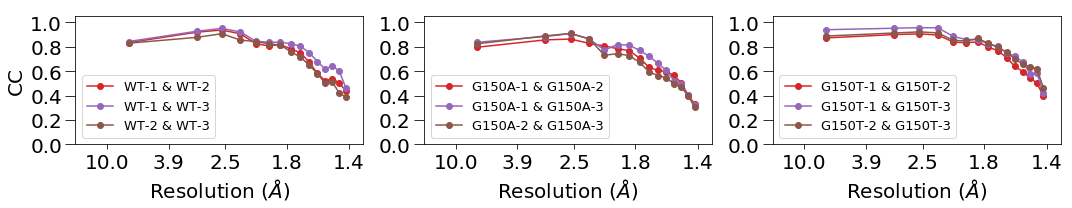

In [19]:
plt.figure(figsize=(15,3))

#######################################
plt.subplot(1,3,1)
labels = ["WT-1 & WT-2","WT-1 & WT-3","WT-2 & WT-3"]

counter = 0
for i,j in [(0,1),(0,2),(1,2)]:
    resolution_invA = res_curve_invA[i,j]
    plt.plot(10*resolution_invA, stats[i,j],"-o", label=labels[counter],c=colors[counter])
    counter += 1
    
plt.legend(loc=3,fontsize=13)
plt.xlim(0.2,7.5)
plt.ylim(0.,1.05)
plt.xlabel("Resolution ($\AA$)",fontsize=20)
plt.ylabel("CC",fontsize=20)
plt.xticks(10./resolution_A, resolution_A,fontsize=20)
plt.yticks(fontsize=20)
plt.tick_params('y', length=10,  which='major')
plt.tick_params('x', length=5, which='major')
plt.tight_layout()
#######################################
plt.subplot(1,3,2)
labels = ["G150A-1 & G150A-2","G150A-1 & G150A-3","G150A-2 & G150A-3"]
counter = 0
for i,j in [(3,4),(3,5),(4,5)]:
    resolution_invA = res_curve_invA[i,j]
    plt.plot(10*resolution_invA, stats[i,j], "-o",label=labels[counter],c=colors[counter]) 
    counter += 1
    
plt.legend(loc=3,fontsize=13)
plt.xlim(0.2,7.5)
plt.ylim(0.,1.05)
plt.xlabel("Resolution ($\AA$)",fontsize=20)
plt.xticks(10./resolution_A, resolution_A,fontsize=20)
plt.yticks(fontsize=20)
plt.tick_params('y', length=10,  which='major')
plt.tick_params('x', length=5, which='major')
plt.tight_layout()
#######################################
plt.subplot(1,3,3)
labels = ["G150T-1 & G150T-2","G150T-1 & G150T-3","G150T-2 & G150T-3"]
counter = 0
for i,j in [(6,7),(6,8),(7,8)]:
    resolution_invA = res_curve_invA[i,j]
    plt.plot(10*resolution_invA, stats[i,j], "-o",label=labels[counter],c=colors[counter]) 
    counter += 1
    
plt.legend(loc=3,fontsize=13)
plt.xlim(0.2,7.5)
plt.ylim(0.,1.05)
plt.xlabel("Resolution ($\AA$)",fontsize=20)
plt.xticks(10./resolution_A, resolution_A,fontsize=20)
plt.yticks(fontsize=20)
plt.tick_params('y', length=10,  which='major')
plt.tick_params('x', length=5, which='major')
plt.tight_layout()
####################################
fig = plt.gcf()
max_fit_dpi = min(int(np.sqrt(25.*1024**2/np.prod(fig.get_size_inches()))),600)
print "dpi = ", max_fit_dpi
plt.tight_layout()
plt.savefig("./600dpi/Fig_07_CCRep.jpg",dpi=600,bbox_inches='tight',pad_inches=0,transparent=True)
plt.savefig("./fitgdoc/Fig_07_CCRep.jpg",dpi=max_fit_dpi,bbox_inches='tight',pad_inches=0,transparent=True)
plt.show()